# **Categorical Plots PLOT VISUALISATION**

This secition covers the following categorical plots:
- countplot
- barplot
- boxplot
- violinplot
- stripplot

## countplot

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
file = '/Users/teslim/TeslimWorkSpace/TheData/The_data_grp1.xlsx'

In [10]:
uk_election2 = pd.read_excel(file, sheet_name='uk_election2', engine='openpyxl')  
uk_election2.head()

,ONS ID,ONS region ID,Constituency name,Region name,Country name,Constituency type,Member first name,Member surname,Member gender,Result,First party,Second party,Electorate,Valid votes,Invalid votes,Majority,Con,Lab,LD,RUK,Green,SNP,PC,DUP,SF,SDLP,UUP,APNI,All other candidates,Of which other winner
0,W07000081,W92000004,Aberafan Maesteg,Wales,Wales,County,Stephen,Kinnock,Male,Lab hold,Lab,RUK,72580,35755,79,10354,2903,17838,916,7484,1094,0,4719,0,0,0,0,0,801,0
1,S14000060,S92000003,Aberdeen North,Scotland,Scotland,Burgh,Kirsty,Blackman,Female,SNP hold,SNP,Lab,75925,42095,115,1760,5881,12773,2583,3781,1275,14533,0,0,0,0,0,0,1269,0
2,S14000061,S92000003,Aberdeen South,Scotland,Scotland,Burgh,Stephen,Flynn,Male,SNP hold,SNP,Lab,77328,46345,178,3758,11300,11455,2921,3199,1609,15213,0,0,0,0,0,0,648,0
3,S14000062,S92000003,Aberdeenshire North and Moray East,Scotland,Scotland,County,Seamus,Logan,Male,SNP gain from Con,SNP,Con,70058,38188,170,942,12513,3876,2782,5562,0,13455,0,0,0,0,0,0,0,0
4,S14000063,S92000003,Airdrie and Shotts,Scotland,Scotland,County,Kenneth,Stevenson,Male,Lab gain from SNP,Lab,SNP,70199,36666,95,7547,1696,18871,725,2971,0,11324,0,0,0,0,0,0,1079,0


In [11]:
uk_election2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ONS ID                 650 non-null    object
 1   ONS region ID          650 non-null    object
 2   Constituency name      650 non-null    object
 3   Region name            650 non-null    object
 4   Country name           650 non-null    object
 5   Constituency type      650 non-null    object
 6   Member first name      650 non-null    object
 7   Member surname         650 non-null    object
 8   Member gender          650 non-null    object
 9   Result                 650 non-null    object
 10  First party            650 non-null    object
 11  Second party           650 non-null    object
 12  Electorate             650 non-null    int64 
 13  Valid votes            650 non-null    int64 
 14  Invalid votes          650 non-null    int64 
 15  Majority               

In [23]:
# clean the column header
def clean_column_header(df):
    df.columns = df.columns.str.strip()
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ', '_')
    return df

# claiing the function 
clean_column_header(uk_election2)

,ons_id,ons_region_id,constituency_name,region_name,country_name,constituency_type,member_first_name,member_surname,member_gender,result,first_party,second_party,electorate,valid_votes,invalid_votes,majority,con,lab,ld,ruk,green,snp,pc,dup,sf,sdlp,uup,apni,all_other_candidates,of_which_other_winner
0,W07000081,W92000004,Aberafan Maesteg,Wales,Wales,County,Stephen,Kinnock,Male,Lab hold,Lab,RUK,72580,35755,79,10354,2903,17838,916,7484,1094,0,4719,0,0,0,0,0,801,0
1,S14000060,S92000003,Aberdeen North,Scotland,Scotland,Burgh,Kirsty,Blackman,Female,SNP hold,SNP,Lab,75925,42095,115,1760,5881,12773,2583,3781,1275,14533,0,0,0,0,0,0,1269,0
2,S14000061,S92000003,Aberdeen South,Scotland,Scotland,Burgh,Stephen,Flynn,Male,SNP hold,SNP,Lab,77328,46345,178,3758,11300,11455,2921,3199,1609,15213,0,0,0,0,0,0,648,0
3,S14000062,S92000003,Aberdeenshire North and Moray East,Scotland,Scotland,County,Seamus,Logan,Male,SNP gain from Con,SNP,Con,70058,38188,170,942,12513,3876,2782,5562,0,13455,0,0,0,0,0,0,0,0
4,S14000063,S92000003,Airdrie and Shotts,Scotland,Scotland,County,Kenneth,Stevenson,Male,Lab gain from SNP,Lab,SNP,70199,36666,95,7547,1696,18871,725,2971,0,11324,0,0,0,0,0,0,1079,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,E14001602,E12000002,Wythenshawe and Sale East,North West,England,Borough,Mike,Kane,Male,Lab hold,Lab,RUK,77767,39132,142,14610,5392,20596,1985,5986,4133,0,0,0,0,0,0,0,1040,0
646,E14001603,E12000009,Yeovil,South West,England,County,Adam,Dance,Male,LD gain from Con,LD,Con,79918,48952,109,12268,11497,3002,23765,7677,2403,0,0,0,0,0,0,0,608,0
647,W07000112,W92000004,Ynys Môn,Wales,Wales,County,Llinos,Medi,Female,PC gain from Con,PC,Con,53141,32628,79,637,9953,7619,439,3223,604,0,10590,0,0,0,0,0,200,0
648,E14001604,E12000003,York Central,Yorkshire and The Humber,England,Borough,Rachael,Maskell,Female,Lab hold,Lab,Con,79557,43323,228,19154,5383,24537,3051,4721,5185,0,0,0,0,0,0,0,446,0


In [22]:

uk_election2.columns.to_list()

['ons_id',
 'ons_region_id',
 'constituency_name',
 'region_name',
 'country_name',
 'constituency_type',
 'member_first_name',
 'member_surname',
 'member_gender',
 'result',
 'first_party',
 'second_party',
 'electorate',
 'valid_votes',
 'invalid_votes',
 'majority',
 'con',
 'lab',
 'ld',
 'ruk',
 'green',
 'snp',
 'pc',
 'dup',
 'sf',
 'sdlp',
 'uup',
 'apni',
 'all_other_candidates',
 'of_which_other_winner']

In [39]:
numerical_col = uk_election2.select_dtypes(include='int64')
categorial_col = uk_election2.select_dtypes(exclude='int64')

In [40]:
categorial_col

,ons_id,ons_region_id,constituency_name,region_name,country_name,constituency_type,member_first_name,member_surname,member_gender,result,first_party,second_party
0,W07000081,W92000004,Aberafan Maesteg,Wales,Wales,County,Stephen,Kinnock,Male,Lab hold,Lab,RUK
1,S14000060,S92000003,Aberdeen North,Scotland,Scotland,Burgh,Kirsty,Blackman,Female,SNP hold,SNP,Lab
2,S14000061,S92000003,Aberdeen South,Scotland,Scotland,Burgh,Stephen,Flynn,Male,SNP hold,SNP,Lab
3,S14000062,S92000003,Aberdeenshire North and Moray East,Scotland,Scotland,County,Seamus,Logan,Male,SNP gain from Con,SNP,Con
4,S14000063,S92000003,Airdrie and Shotts,Scotland,Scotland,County,Kenneth,Stevenson,Male,Lab gain from SNP,Lab,SNP
...,...,...,...,...,...,...,...,...,...,...,...,...
645,E14001602,E12000002,Wythenshawe and Sale East,North West,England,Borough,Mike,Kane,Male,Lab hold,Lab,RUK
646,E14001603,E12000009,Yeovil,South West,England,County,Adam,Dance,Male,LD gain from Con,LD,Con
647,W07000112,W92000004,Ynys Môn,Wales,Wales,County,Llinos,Medi,Female,PC gain from Con,PC,Con
648,E14001604,E12000003,York Central,Yorkshire and The Humber,England,Borough,Rachael,Maskell,Female,Lab hold,Lab,Con


In [41]:
numerical_col

,electorate,valid_votes,invalid_votes,majority,con,lab,ld,ruk,green,snp,pc,dup,sf,sdlp,uup,apni,all_other_candidates,of_which_other_winner
0,72580,35755,79,10354,2903,17838,916,7484,1094,0,4719,0,0,0,0,0,801,0
1,75925,42095,115,1760,5881,12773,2583,3781,1275,14533,0,0,0,0,0,0,1269,0
2,77328,46345,178,3758,11300,11455,2921,3199,1609,15213,0,0,0,0,0,0,648,0
3,70058,38188,170,942,12513,3876,2782,5562,0,13455,0,0,0,0,0,0,0,0
4,70199,36666,95,7547,1696,18871,725,2971,0,11324,0,0,0,0,0,0,1079,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,77767,39132,142,14610,5392,20596,1985,5986,4133,0,0,0,0,0,0,0,1040,0
646,79918,48952,109,12268,11497,3002,23765,7677,2403,0,0,0,0,0,0,0,608,0
647,53141,32628,79,637,9953,7619,439,3223,604,0,10590,0,0,0,0,0,200,0
648,79557,43323,228,19154,5383,24537,3051,4721,5185,0,0,0,0,0,0,0,446,0


In [36]:
# clean the column content 
def clean_column_content(row):
    return row.str.lower()

In [55]:
df1 = categorial_col.apply(clean_column_content, axis=1)

In [54]:
data = pd.concat([df1, numerical_col], axis=1)
data.head()

,ons_id,ons_region_id,constituency_name,region_name,country_name,constituency_type,member_first_name,member_surname,member_gender,result,first_party,second_party,electorate,valid_votes,invalid_votes,majority,con,lab,ld,ruk,green,snp,pc,dup,sf,sdlp,uup,apni,all_other_candidates,of_which_other_winner
0,w07000081,w92000004,aberafan maesteg,wales,wales,county,stephen,kinnock,male,lab hold,lab,ruk,72580,35755,79,10354,2903,17838,916,7484,1094,0,4719,0,0,0,0,0,801,0
1,s14000060,s92000003,aberdeen north,scotland,scotland,burgh,kirsty,blackman,female,snp hold,snp,lab,75925,42095,115,1760,5881,12773,2583,3781,1275,14533,0,0,0,0,0,0,1269,0
2,s14000061,s92000003,aberdeen south,scotland,scotland,burgh,stephen,flynn,male,snp hold,snp,lab,77328,46345,178,3758,11300,11455,2921,3199,1609,15213,0,0,0,0,0,0,648,0
3,s14000062,s92000003,aberdeenshire north and moray east,scotland,scotland,county,seamus,logan,male,snp gain from con,snp,con,70058,38188,170,942,12513,3876,2782,5562,0,13455,0,0,0,0,0,0,0,0
4,s14000063,s92000003,airdrie and shotts,scotland,scotland,county,kenneth,stevenson,male,lab gain from snp,lab,snp,70199,36666,95,7547,1696,18871,725,2971,0,11324,0,0,0,0,0,0,1079,0


## Basic Count Plot

<Axes: xlabel='constituency_type', ylabel='count'>

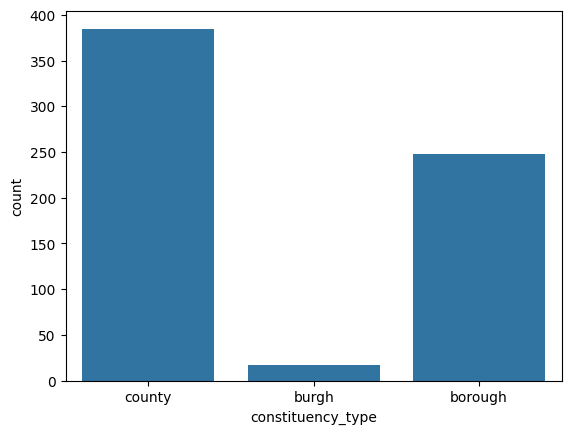

In [56]:
sns.countplot(data=data, x='constituency_type')

<Axes: xlabel='count', ylabel='member_gender'>

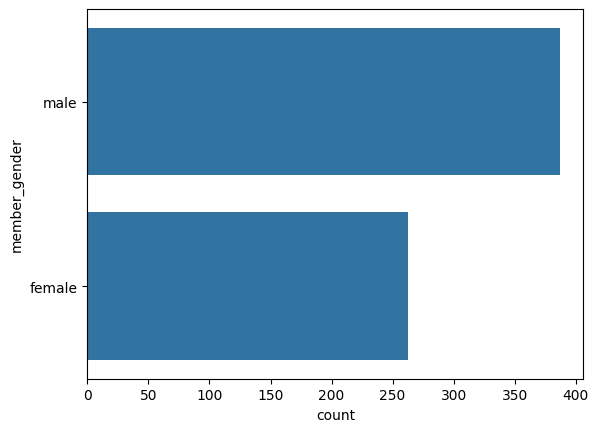

In [57]:
sns.countplot(data=data, y ='member_gender')

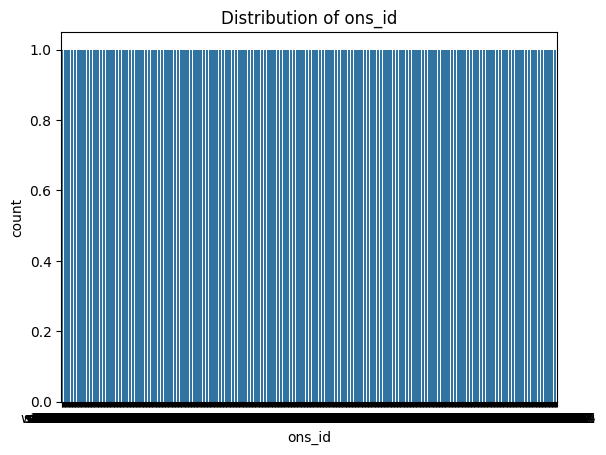

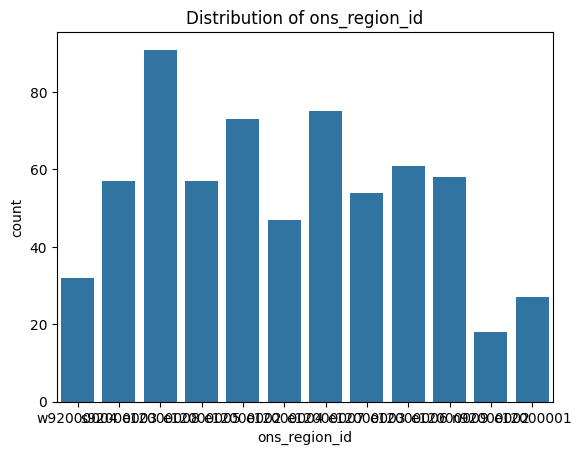

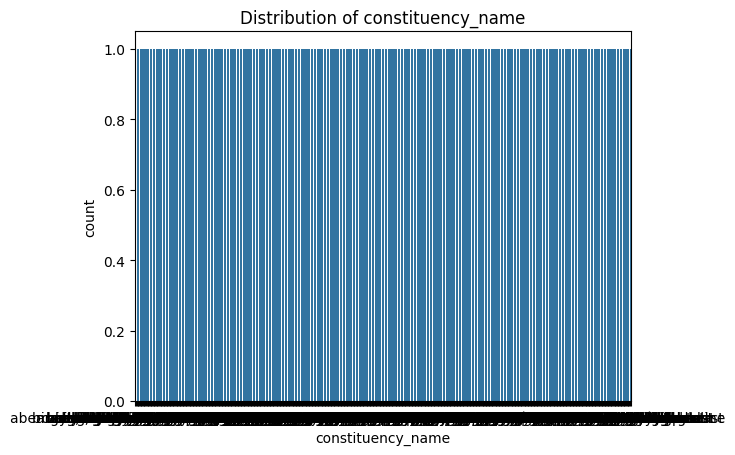

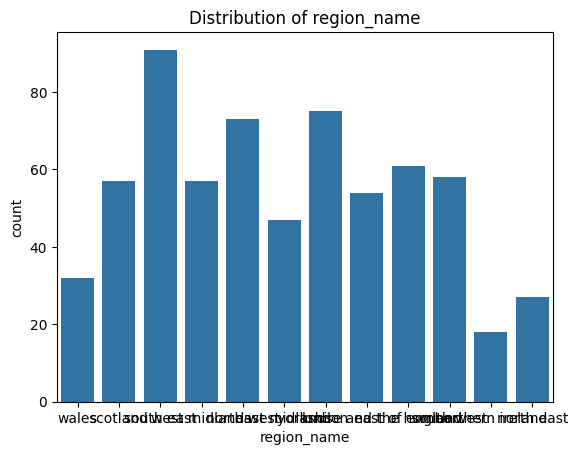

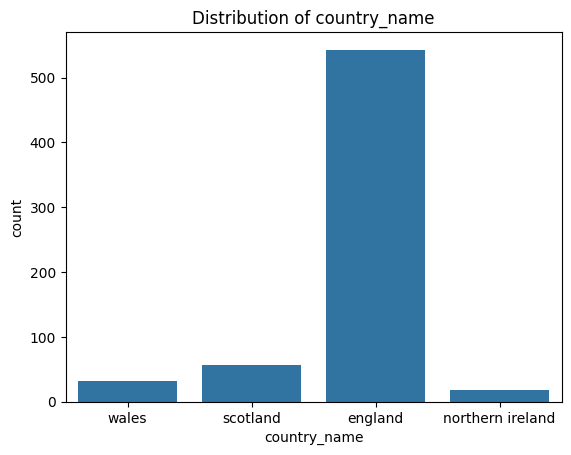

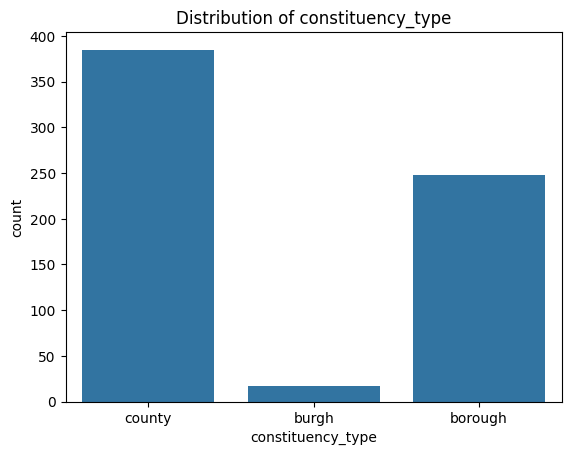

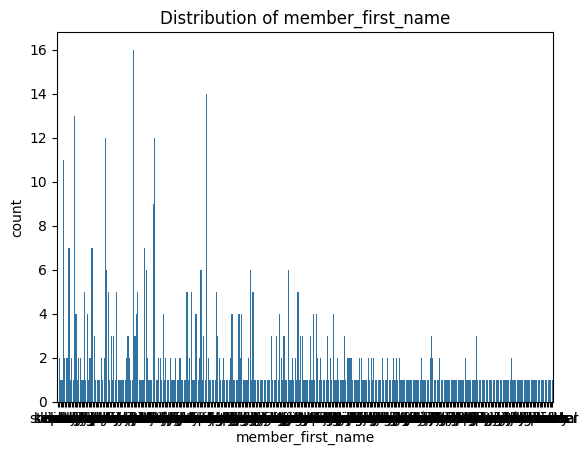

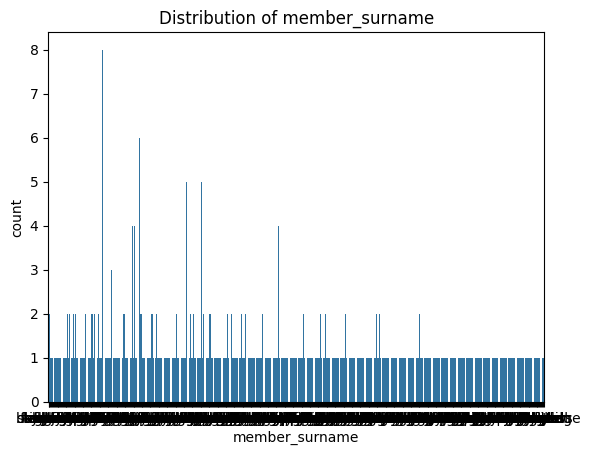

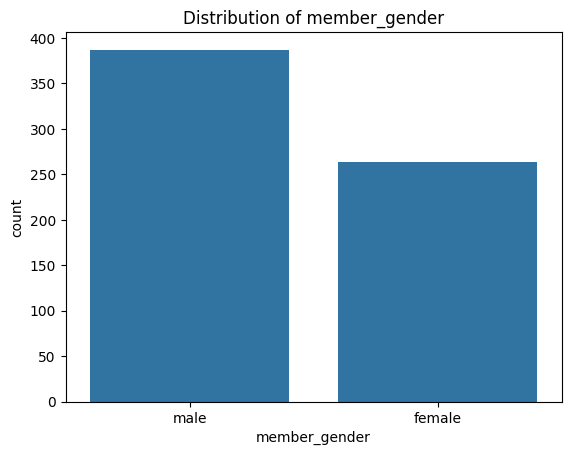

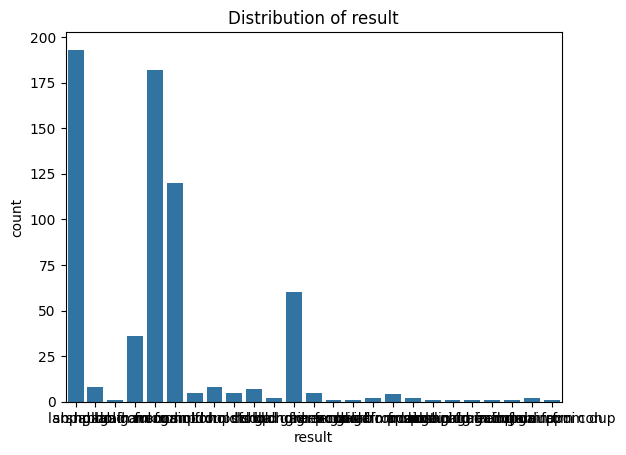

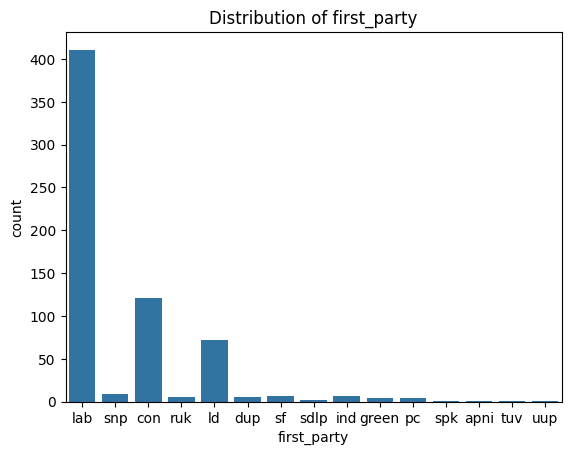

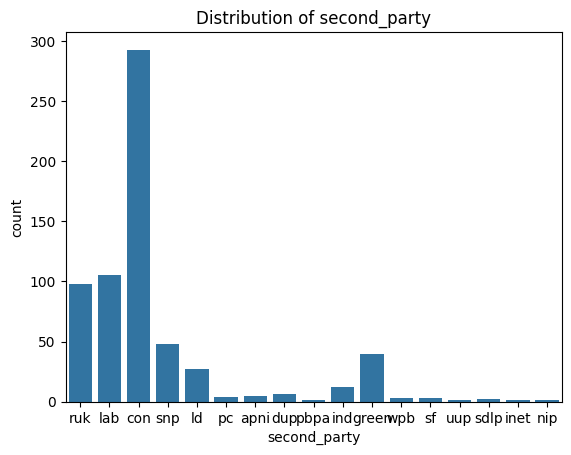

In [60]:
for col in categorial_col:
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()